In [204]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
stopwords = nltk.corpus.stopwords.words('english')
import string
import re

### Load Dataset and drop unnecessary columns

In [205]:
df = pd.read_csv("labeled_data.csv")
df=df.drop(df.index[5001:])
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Preprocessing
#### Steps
* Removing Punctuations
* Removing URLs
* Removing Stop Words
* Lower Casing
* Tokenization
* Stemming
* Lemmatization

Reference: https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [208]:
# Punctuation Removal
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation]).strip()
    return punctuation_free
df["punctuation_free"] = df["tweet"].apply(lambda x : remove_punctuation(x)) 
df.head()   

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,punctuation_free
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compla...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuffi...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You ever...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me m...


In [209]:
# Convert to lowercase
df["tweet_lower"] = df["punctuation_free"].apply(lambda x: x.lower())
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,punctuation_free,tweet_lower
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compla...,rt mayasolovely as a woman you shouldnt compla...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuffi...,rt mleew17 boy dats coldtyga dwn bad for cuffi...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You ever...,rt urkindofbrand dawg rt 80sbaby4life you ever...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me m...,rt shenikaroberts the shit you hear about me m...


In [210]:
# Tokenization
def tokenize(text): # Reference: https://pynative.com/python-regex-split/
    tokens = re.split(r"\s+", text)
    return tokens
df["tokenized_tweet"] = df["tweet_lower"].apply(lambda x : tokenize(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,punctuation_free,tweet_lower,tokenized_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compla...,rt mayasolovely as a woman you shouldnt compla...,"[rt, mayasolovely, as, a, woman, you, shouldnt..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuffi...,rt mleew17 boy dats coldtyga dwn bad for cuffi...,"[rt, mleew17, boy, dats, coldtyga, dwn, bad, f..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You ever...,rt urkindofbrand dawg rt 80sbaby4life you ever...,"[rt, urkindofbrand, dawg, rt, 80sbaby4life, yo..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,rt cganderson vivabased she look like a tranny,"[rt, cganderson, vivabased, she, look, like, a..."
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me m...,rt shenikaroberts the shit you hear about me m...,"[rt, shenikaroberts, the, shit, you, hear, abo..."


In [211]:
# Remove Stopwords
def remove_stopwords(text):
    removed_stopwords = [i for i in text if i not in stopwords]
    return removed_stopwords

df["no_stopwords"] = df["tokenized_tweet"].apply(lambda x : remove_stopwords(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,punctuation_free,tweet_lower,tokenized_tweet,no_stopwords
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compla...,rt mayasolovely as a woman you shouldnt compla...,"[rt, mayasolovely, as, a, woman, you, shouldnt...","[rt, mayasolovely, woman, shouldnt, complain, ..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuffi...,rt mleew17 boy dats coldtyga dwn bad for cuffi...,"[rt, mleew17, boy, dats, coldtyga, dwn, bad, f...","[rt, mleew17, boy, dats, coldtyga, dwn, bad, c..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You ever...,rt urkindofbrand dawg rt 80sbaby4life you ever...,"[rt, urkindofbrand, dawg, rt, 80sbaby4life, yo...","[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,rt cganderson vivabased she look like a tranny,"[rt, cganderson, vivabased, she, look, like, a...","[rt, cganderson, vivabased, look, like, tranny]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me m...,rt shenikaroberts the shit you hear about me m...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[rt, shenikaroberts, shit, hear, might, true, ..."


In [212]:
# Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemmatized_text
df["lemmatized_tweet"] = df["no_stopwords"].apply(lambda x : lemmatizer(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,punctuation_free,tweet_lower,tokenized_tweet,no_stopwords,lemmatized_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compla...,rt mayasolovely as a woman you shouldnt compla...,"[rt, mayasolovely, as, a, woman, you, shouldnt...","[rt, mayasolovely, woman, shouldnt, complain, ...","[rt, mayasolovely, woman, shouldnt, complain, ..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuffi...,rt mleew17 boy dats coldtyga dwn bad for cuffi...,"[rt, mleew17, boy, dats, coldtyga, dwn, bad, f...","[rt, mleew17, boy, dats, coldtyga, dwn, bad, c...","[rt, mleew17, boy, dat, coldtyga, dwn, bad, cu..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You ever...,rt urkindofbrand dawg rt 80sbaby4life you ever...,"[rt, urkindofbrand, dawg, rt, 80sbaby4life, yo...","[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev...","[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,rt cganderson vivabased she look like a tranny,"[rt, cganderson, vivabased, she, look, like, a...","[rt, cganderson, vivabased, look, like, tranny]","[rt, cganderson, vivabased, look, like, tranny]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me m...,rt shenikaroberts the shit you hear about me m...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[rt, shenikaroberts, shit, hear, might, true, ...","[rt, shenikaroberts, shit, hear, might, true, ..."


### Additional Preprocessing Steps..
Some additional preprocessing steps for better result such as 'URL removal' and 'Spell Correction' will be implemented later if time permits <br>
Reference URL Removal: https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

### Feature Extraction
* Count Vectorization(Bag-of-Words)
* Tf-idf

In [213]:
# Feature Extraction using Count Vectorization
vocabulary = set()
for tweet in (df["lemmatized_tweet"]):
    for word in tweet:
        vocabulary.add(word)

def generate_bag_of_words(text_vector):
    count_vector = np.array([text_vector.count(word) for word in vocabulary])
    return count_vector
df["count_vectorized_tweets"] = df["lemmatized_tweet"].apply(lambda x : generate_bag_of_words(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,punctuation_free,tweet_lower,tokenized_tweet,no_stopwords,lemmatized_tweet,count_vectorized_tweets
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compla...,rt mayasolovely as a woman you shouldnt compla...,"[rt, mayasolovely, as, a, woman, you, shouldnt...","[rt, mayasolovely, woman, shouldnt, complain, ...","[rt, mayasolovely, woman, shouldnt, complain, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuffi...,rt mleew17 boy dats coldtyga dwn bad for cuffi...,"[rt, mleew17, boy, dats, coldtyga, dwn, bad, f...","[rt, mleew17, boy, dats, coldtyga, dwn, bad, c...","[rt, mleew17, boy, dat, coldtyga, dwn, bad, cu...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You ever...,rt urkindofbrand dawg rt 80sbaby4life you ever...,"[rt, urkindofbrand, dawg, rt, 80sbaby4life, yo...","[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev...","[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,rt cganderson vivabased she look like a tranny,"[rt, cganderson, vivabased, she, look, like, a...","[rt, cganderson, vivabased, look, like, tranny]","[rt, cganderson, vivabased, look, like, tranny]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me m...,rt shenikaroberts the shit you hear about me m...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[rt, shenikaroberts, shit, hear, might, true, ...","[rt, shenikaroberts, shit, hear, might, true, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [214]:
# Feature Extraction using Tf-idf
# Todo

In [215]:
# Split the dataset between Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(list(df["count_vectorized_tweets"]), df["class"], test_size=0.2, random_state=42, shuffle=True)

### Fit the models
Algorithms
* Logistic Regression
* Naive Bayes Classifier
* Support Vector Machine/Decision Trees/Kth Nearest Neighbor/Simple Neural Networks

### Logistic Regression

In [216]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg_y_predict = reg.predict(X_test)
reg_cf_matrix = confusion_matrix(y_test, reg_y_predict)
reg_score = reg.score(X_test, y_test)
print(reg_score)

0.8681318681318682


### Naive Bayes Classifier

In [217]:
nvc = GaussianNB()
nvc.fit(X_train, y_train)
nvc_y_predict = nvc.predict(X_test)
nvc_cf_matrix = confusion_matrix(y_test, nvc_y_predict)
nvc_score = nvc.score(X_test, y_test)
print(nvc_score)

0.6383616383616384


## Kth Nearest Neighbor

In [218]:
knn = KNN(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)
knn_cf_matrix = confusion_matrix(y_test, knn_y_predict)
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.8111888111888111


### Confusion Matrix

In [232]:
# Reference: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=Plot%20Confusion%20Matrix%20for%20Binary%20Classes%20With%20Labels&text=You%20need%20to%20create%20a,matrix%20with%20the%20labels%20annotation.

def display_confusion_matrix(cf_matrix, model_name, color_map): 
    dataframe_cfm = pd.DataFrame(cf_matrix, range(3), range(3))
    ax = sns.heatmap(dataframe_cfm, annot=True, fmt='', cmap=color_map)
    ax.set_title(f'Confusion Matrix for {model_name} \n\n');
    ax.set_xlabel('\nPredicted Label')
    ax.set_ylabel('Actual Label');
    ax.xaxis.set_ticklabels(['False','True', "False"])
    ax.yaxis.set_ticklabels(['False','True', "False"])
    plt.show()

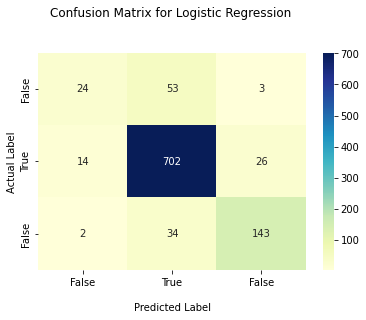

In [233]:
# Confusion Matrix for Logistic Regression Model
display_confusion_matrix(reg_cf_matrix, "Logistic Regression", "YlGnBu")

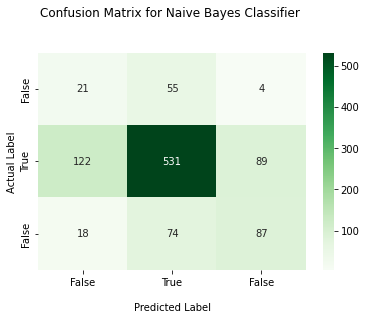

In [236]:
# Confusion Matrix for Naive Bayes Classifier Model
display_confusion_matrix(nvc_cf_matrix, "Naive Bayes Classifier", "Greens")

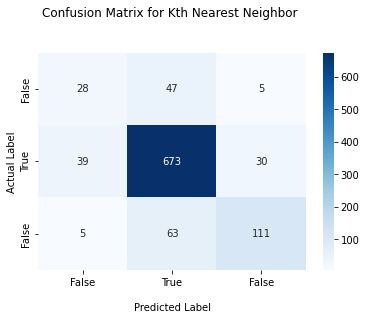

In [242]:
# Confusion Matrix for Kth Nearest Neighbor Model
display_confusion_matrix(knn_cf_matrix, "Kth Nearest Neighbor", "Blues")

### Comparison Between Different Models

In [223]:
# Plot a comparison between the models using histograms, percentage scores and f1 scores

In [224]:
# Include a lot of plots throughout the project